# 1. Stage I: Raw Data
This stage involves collecting and storing the original raw data.

```bash
|-- tomato_project
|   |-- data_raw
|       |-- raw_frailty_data.csv
|       |-- README.txt


In [ ]:
import pandas as pd
file_path = '/content/Frailty.csv'

# Data Loading using Pandas
df = pd.read_csv(file_path)

# Data Set Preview
df.head(11)

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


# Create Directory

in the below Step i moved my Raw dataset(Failty.csv) in to the data_raw folder and named it into "raw_data.csv". If anything goes wrong with my work and end up loosing the data, i can work on the raw data from scratch.

In [ ]:
# Create the directory for raw data
!mkdir -p tomato_project/data_raw

# Move your dataset into this folder (assuming it's already saved as raw_frailty_data.csv)
!mv Frailty.csv tomato_project/data_raw/raw_data.csv

# Create a README file explaining the raw data contents
!echo "Raw dataset for 10 female participants measuring Height, Weight, Age, Grip Strength, and Frailty." > tomato_project/data_raw/README.txt

#2. Stage II: Data Processing
This stage focuses on cleaning and transforming the raw data.Handle missing values, correct data types, and prepare it for analysis.

Folder Structure:

```bash
|-- tomato_project
|   |-- data_clean
|       |-- cleaned_data.csv
|   |-- src
|       |-- clean_data.py


In [ ]:
# Create directories for cleaned data and source code
!mkdir -p tomato_project/data_clean
!mkdir -p tomato_project/src

# Create a Python script to clean the data (for example, handling missing values)
!touch tomato_project/src/clean_data.py


In [ ]:
# Using the isnull method to identify and count missing values in each column
missing_values_count = df.isnull().sum()

# Displaying Missing Values Count
print("Missing values count in each column:")
print(missing_values_count)

# Checking for overall missing values using the isnull().any().sum() approach
total_missing = df.isnull().any().sum()
if total_missing > 0:
    print(f"There are missing values in {total_missing} columns.")
else:
    print("No missing values in the DataFrame.")


Missing values count in each column:
Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64
No missing values in the DataFrame.


There are no missing values. Hence, we can proceed with the Data Cleaning.

# Data Cleaning

In [ ]:
import pandas as pd
import os
# Ensure the directory exists
output_dir = 'tomato_project/data_clean'

# Filter the DataFrame where column 4 does not contain 'N'
df_filtered = df[df.iloc[:, 4].str.contains('N') == False]

# Display the filtered DataFrame
print(df_filtered)

# Save the cleaned data to the specified folder
output_path = os.path.join(output_dir, 'cleaned_data.csv')
df_filtered.to_csv(output_path, index=False)


   Height  Weight  Age  Grip strength Frailty
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y


I moved the cleaned data to the folder named "data_clean" and renamed the file to cleaned_data.csv

# 3. Stage III: Results & Analysis
This stage involves analyzing the cleaned data and saving the results.

Folder Structure:


```bash
|-- tomato_project
|   |-- data_clean
|       |-- cleaned_data.csv
|   |-- data_raw
|       |-- raw_data.csv
|       |-- README.txt
|   |-- results
|       |-- t_test_results.txt
|   |-- src
|       |-- Analysis.py


T-Test Results for Age and Grip Strength:
   Statistic  P-value
0   1.111166  0.30903


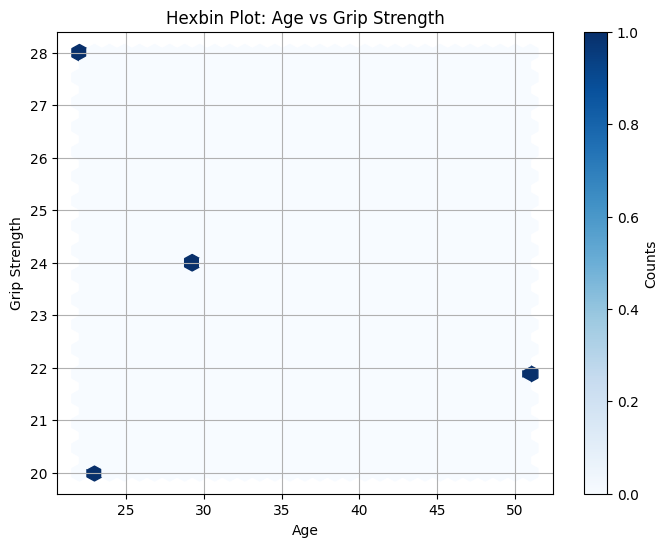

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

# Perform T-Test analysis between 'Age' and 'Grip strength'
ttest_results = ttest_ind(df_filtered['Age'], df_filtered['Grip strength'])

# Display T-Test results in tabular form
ttest_table = pd.DataFrame({
    'Statistic': [ttest_results.statistic],
    'P-value': [ttest_results.pvalue]
})

print("T-Test Results for Age and Grip Strength:")
print(ttest_table)

# Plotting a Hexbin plot: Age vs Grip Strength with color intensity
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df_filtered['Age'], df_filtered['Grip strength'], gridsize=30, cmap='Blues')

# Adding a color bar to indicate density
cb = plt.colorbar(hb)
cb.set_label('Counts')

# Customize plot
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Hexbin Plot: Age vs Grip Strength')
plt.grid(True)

# Display the plot
plt.show()
